In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
output_data = pd.read_csv(r'peds_loc.txt', header=None, sep=',' )
output_data.columns = ['Time', 'X', 'Y']
output_data

,Time,X,Y
0,0,360.0,610.0
1,0,360.0,609.0
2,0,360.0,609.0
3,0,360.0,608.0
4,0,360.0,608.0
...,...,...,...
29037,60,147.0,360.0
29038,60,360.0,176.0
29039,60,360.0,428.0
29040,60,360.0,534.0


In [64]:
grid = np.zeros((700,700))
grid_anim = np.zeros((len(unq_time), 700,700))
for i in unq_time:
    temp = output_data.loc[output_data['Time']==i]
    x_coor = temp[['X']].to_numpy()
    y_coor = temp[['Y']].to_numpy()
    time = temp[['Time']].to_numpy()
    for grid_x, grid_y in zip(x_coor, y_coor):
        grid_x = int(grid_x)
        grid_y = int(grid_y)
        grid[grid_x-20:grid_x+20, grid_y-20:grid_y+20] = 0
        grid[grid_x-15:grid_x+15, grid_y-15:grid_y+15] = 20
        grid[grid_x-10:grid_x+10, grid_y-10:grid_y+10] = 50
        grid[grid_x-5:grid_x+5, grid_y-5:grid_y+5] = 100
        grid[grid_x, grid_y] = 500
            
    grid_anim[i,:,:] = grid

0


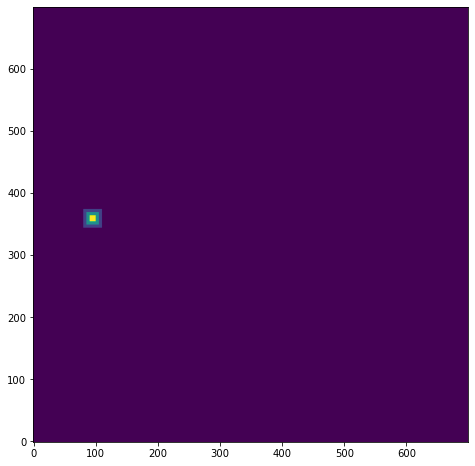

1


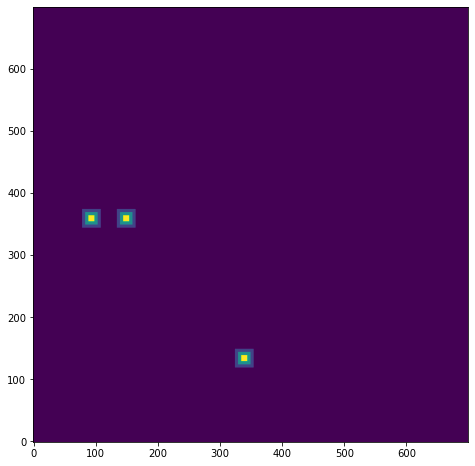

2


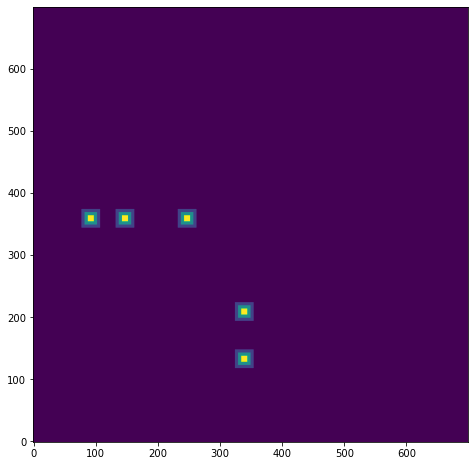

3


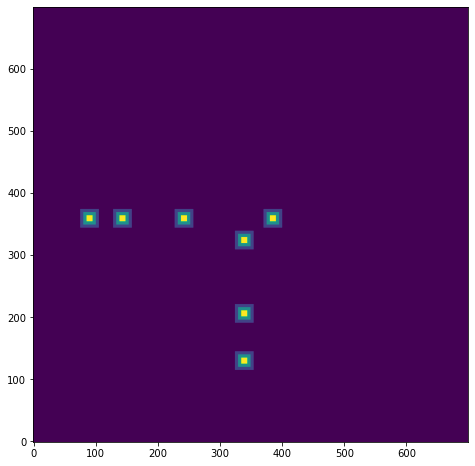

4


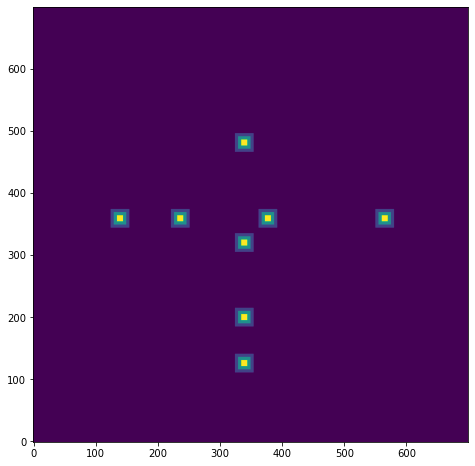

5


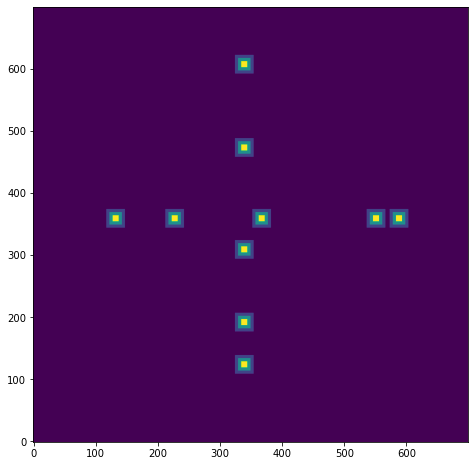

6


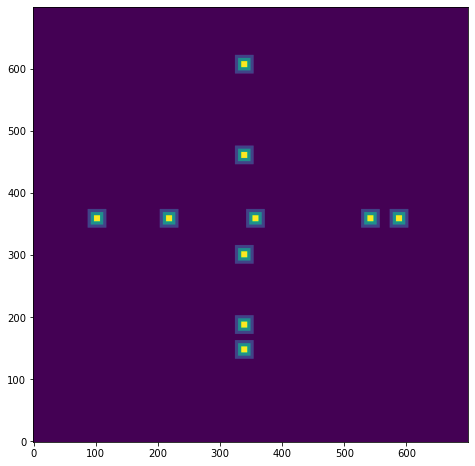

7


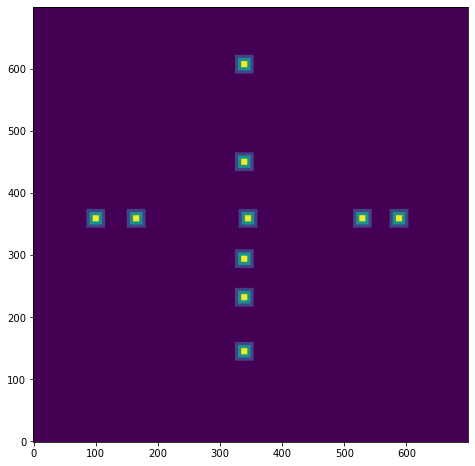

8


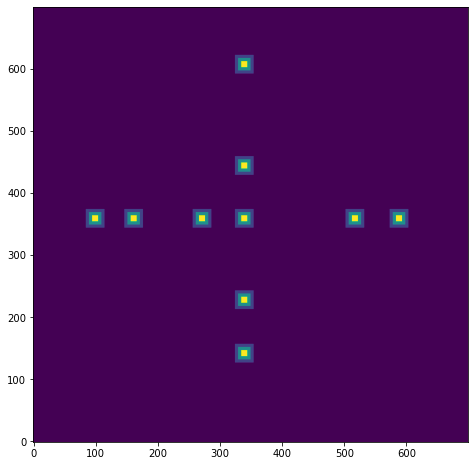

9


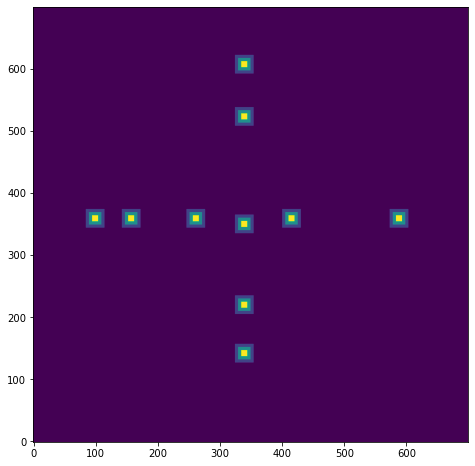

10


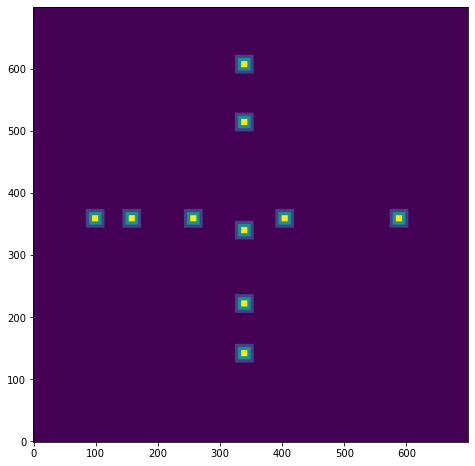

11


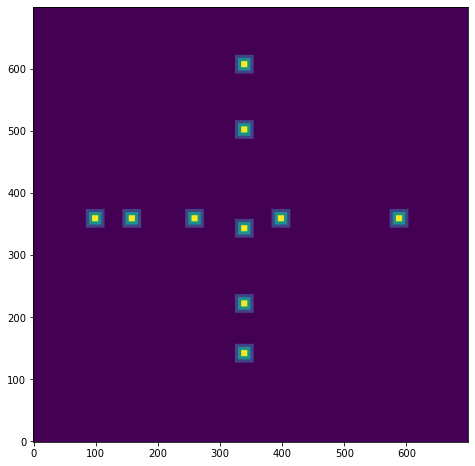

12


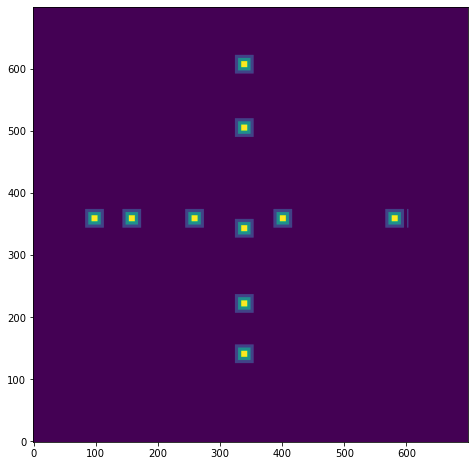

13


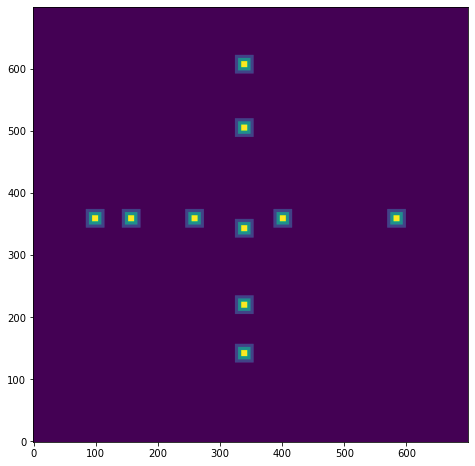

14


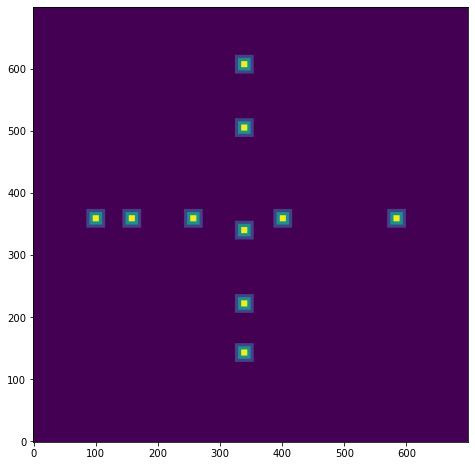

15


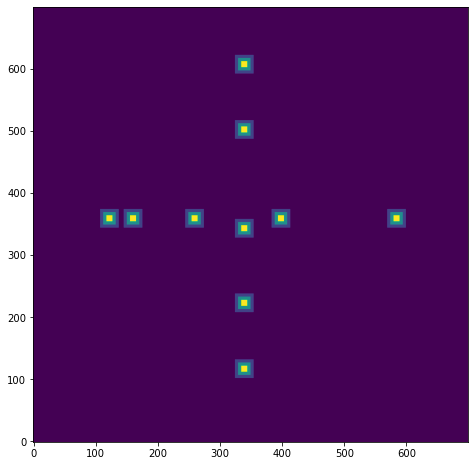

16


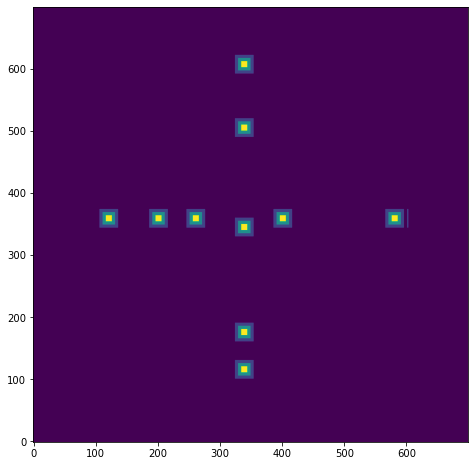

17


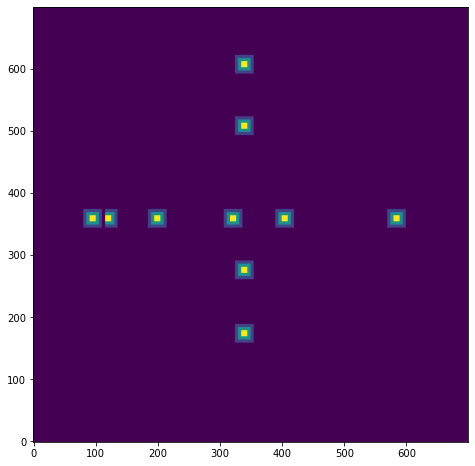

18


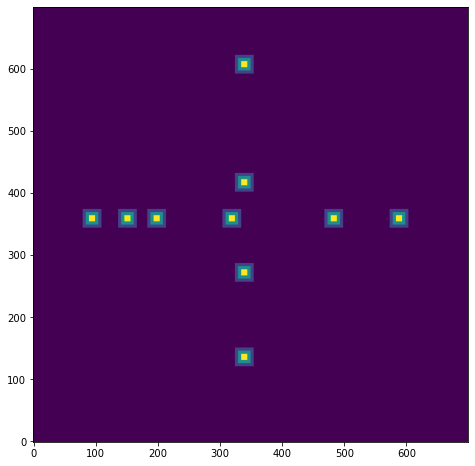

19


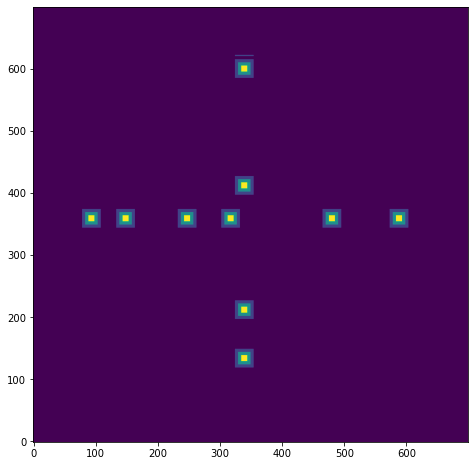

20


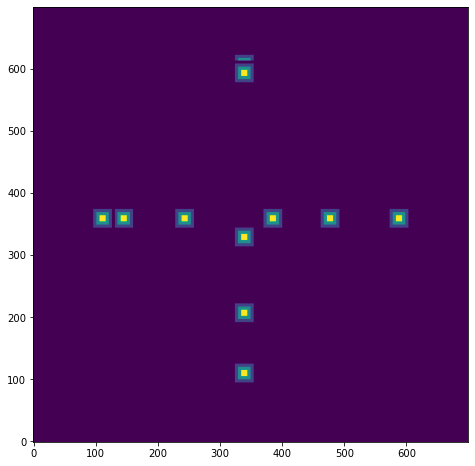

21


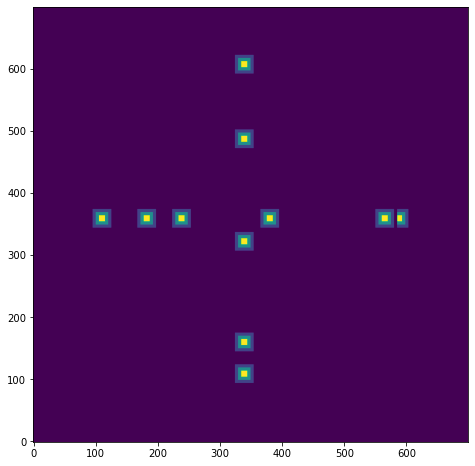

22


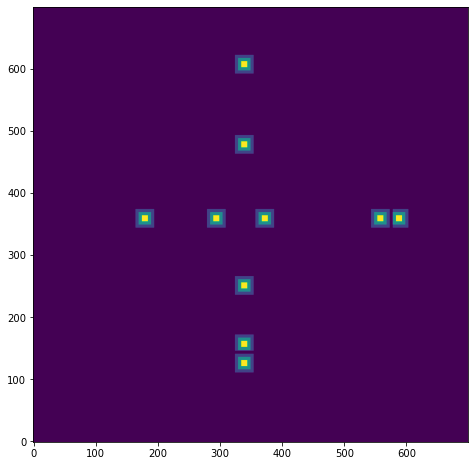

23


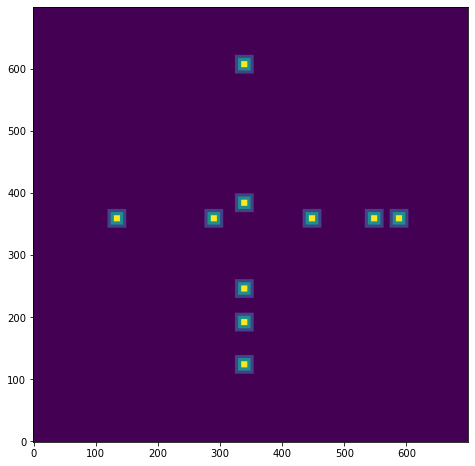

24


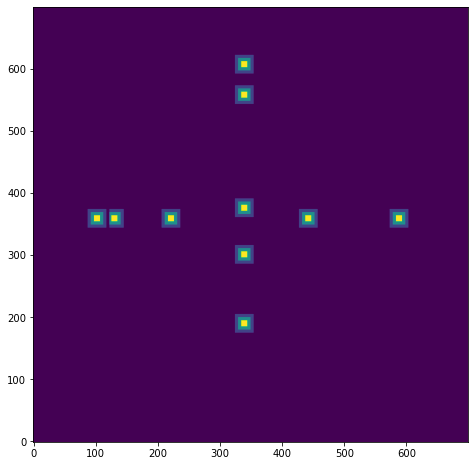

25


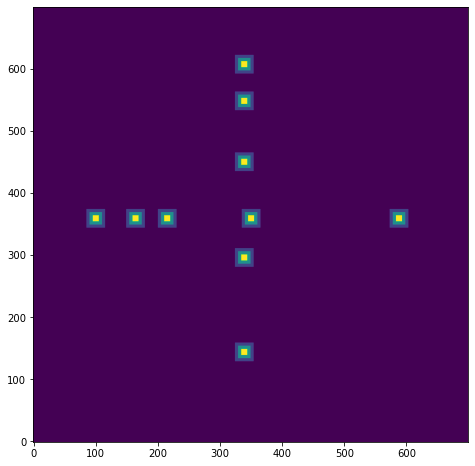

26


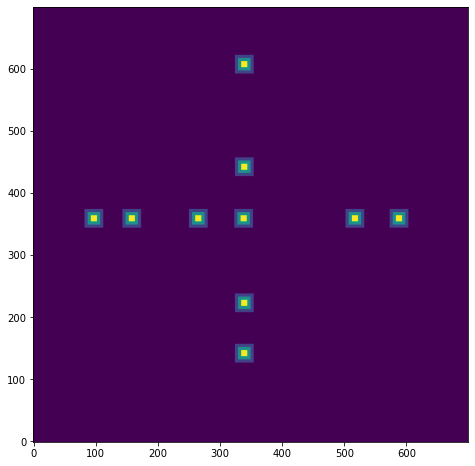

27


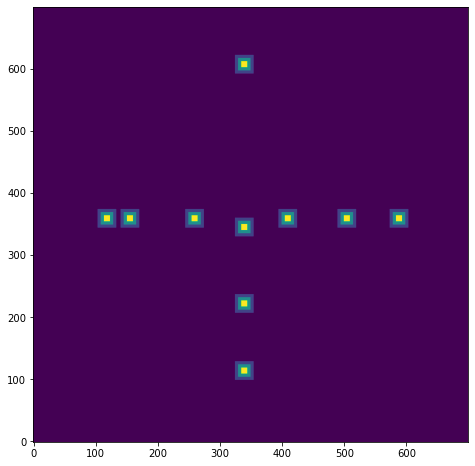

28


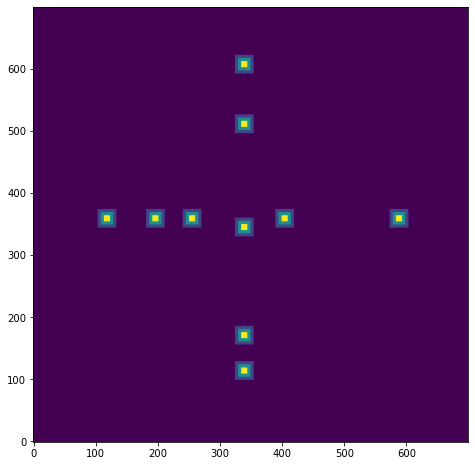

29


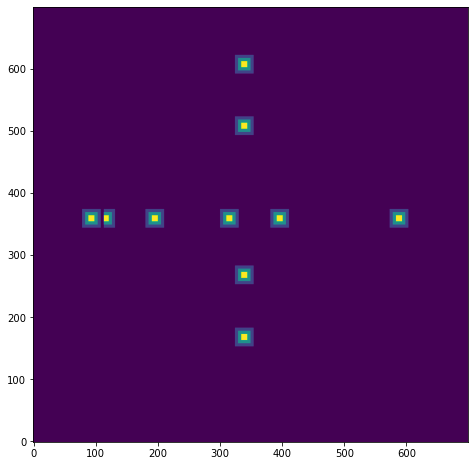

30


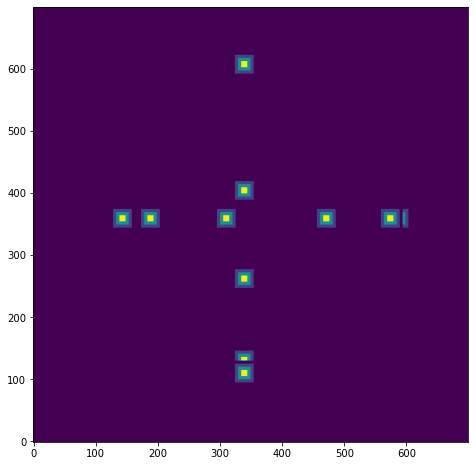

31


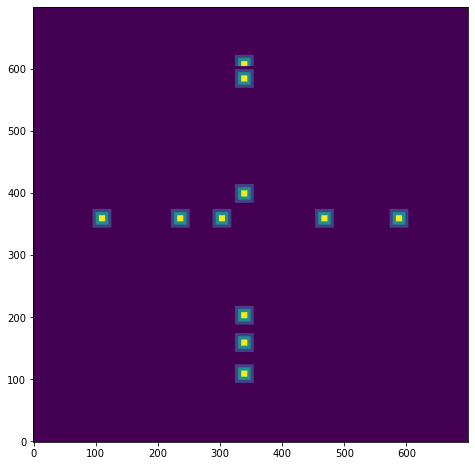

32


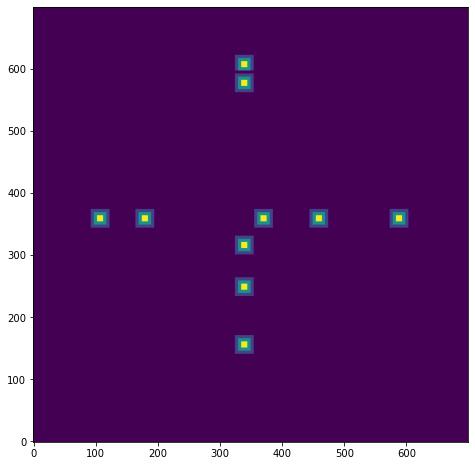

33


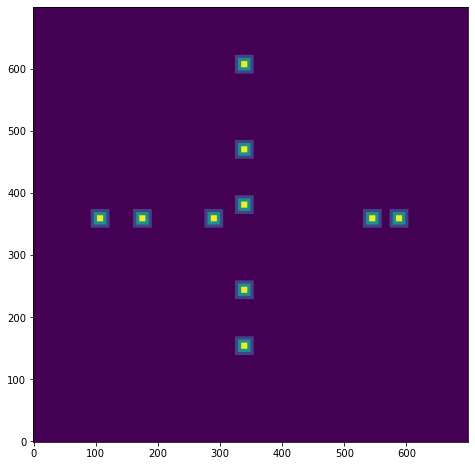

34


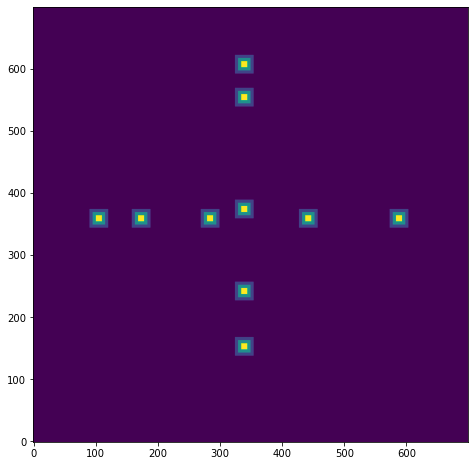

35


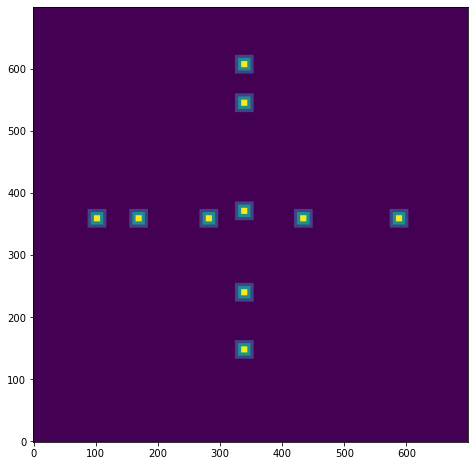

36


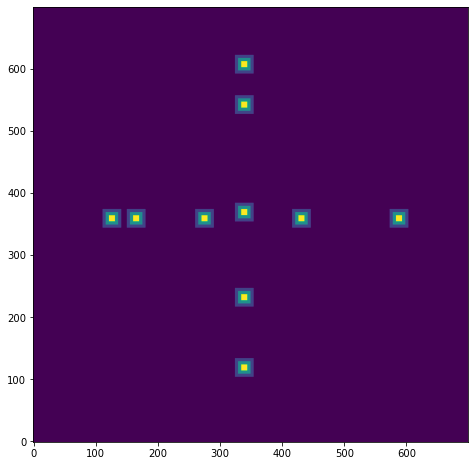

37


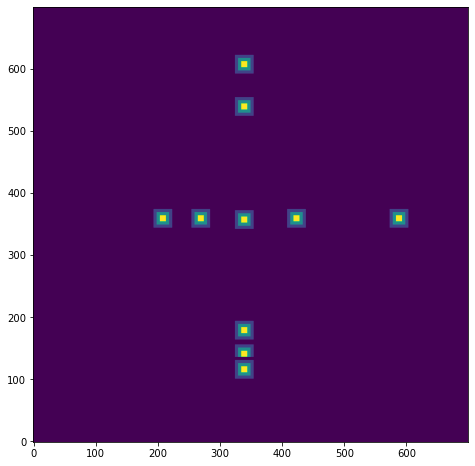

38


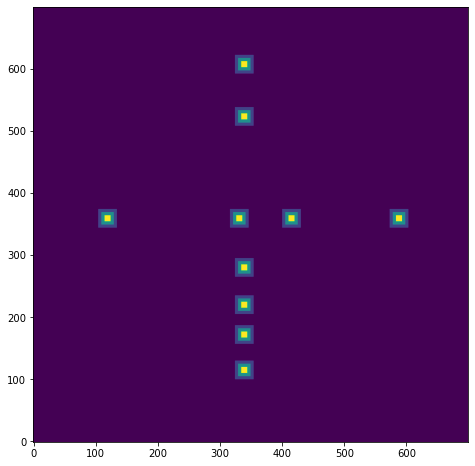

39


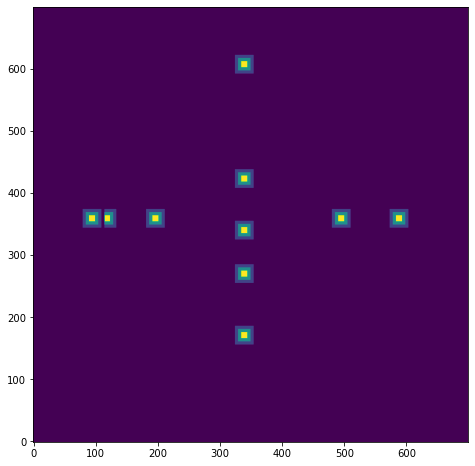

40


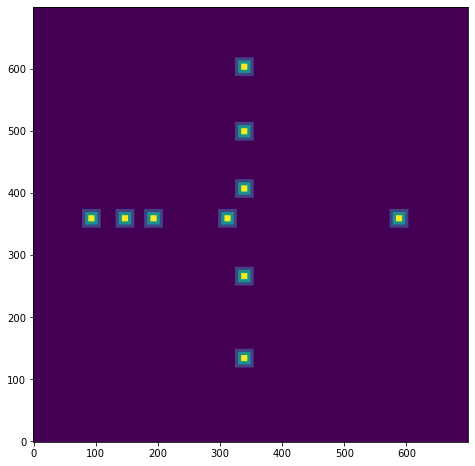

41


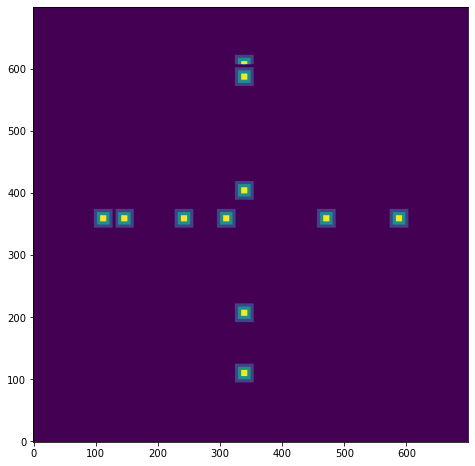

42


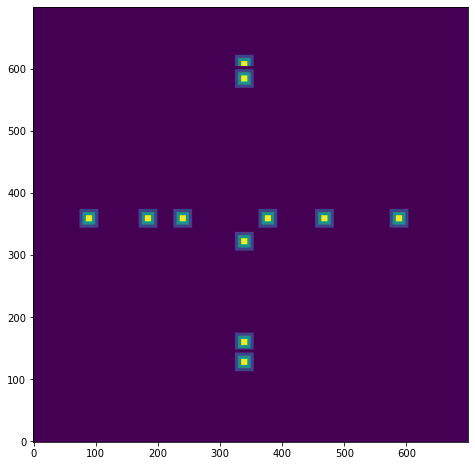

43


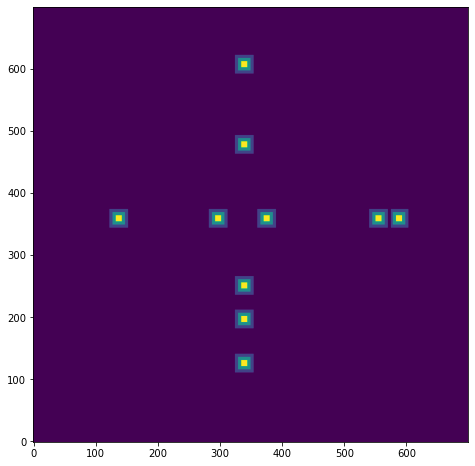

44


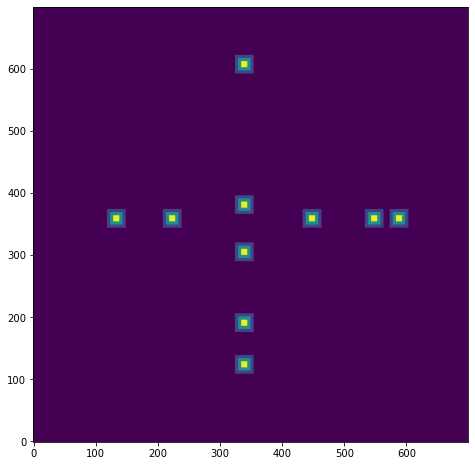

45


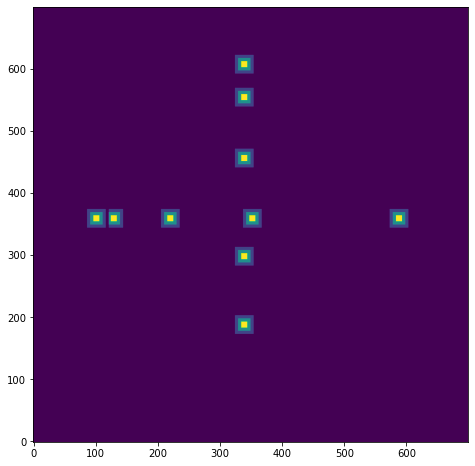

46


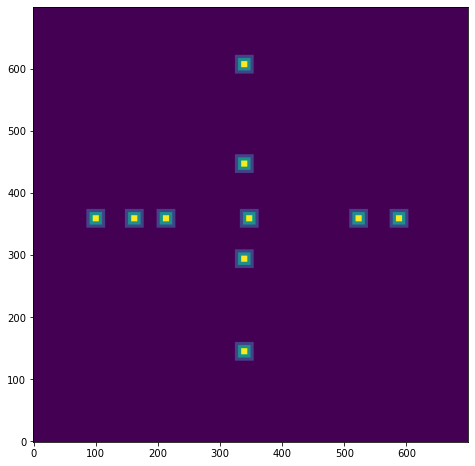

47


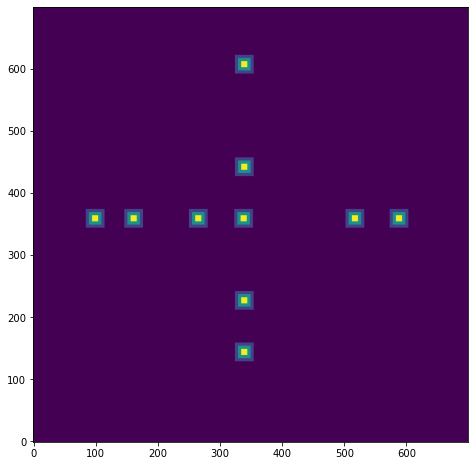

48


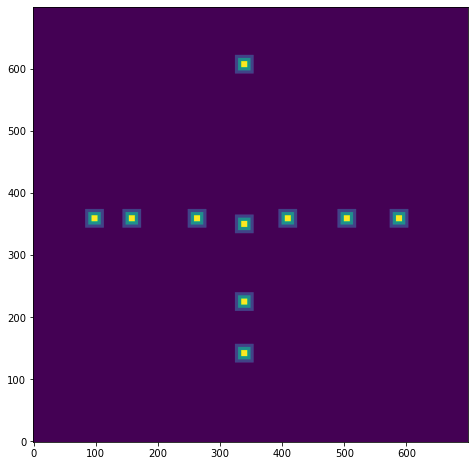

49


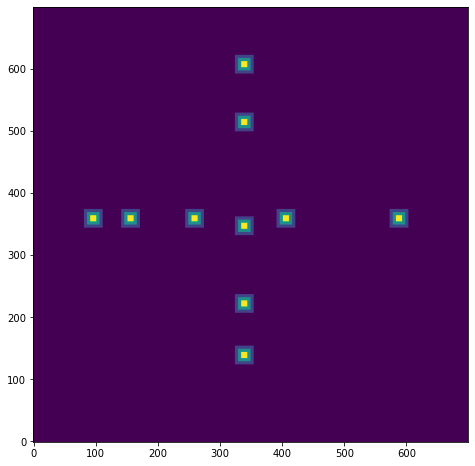

50


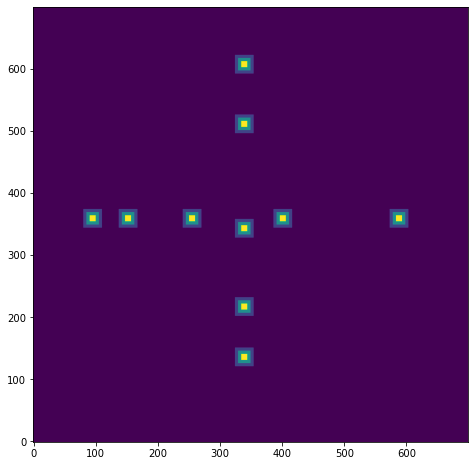

51


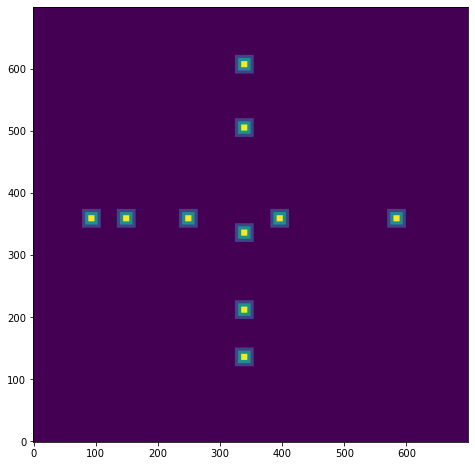

52


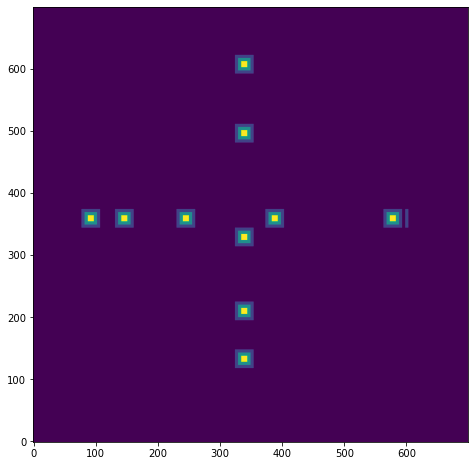

53


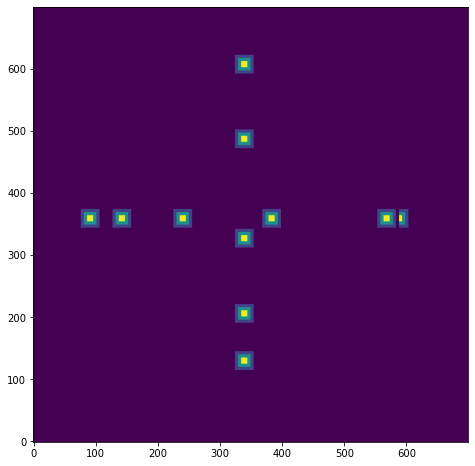

54


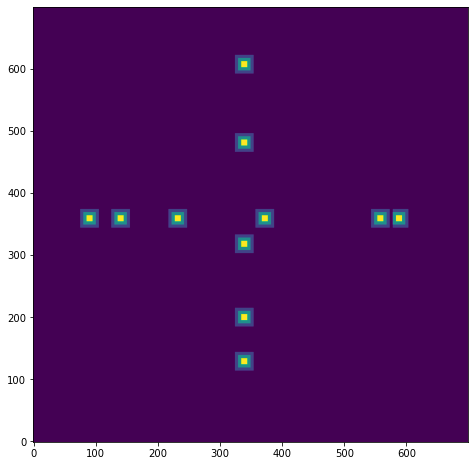

55


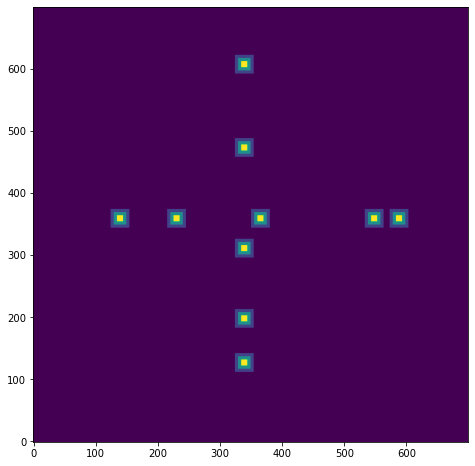

56


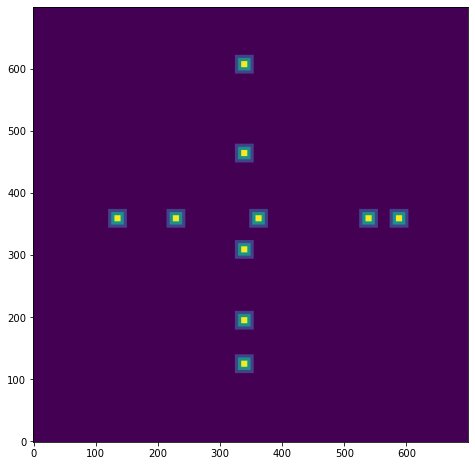

57


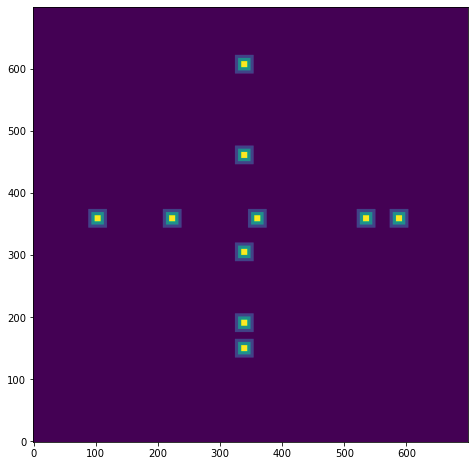

58


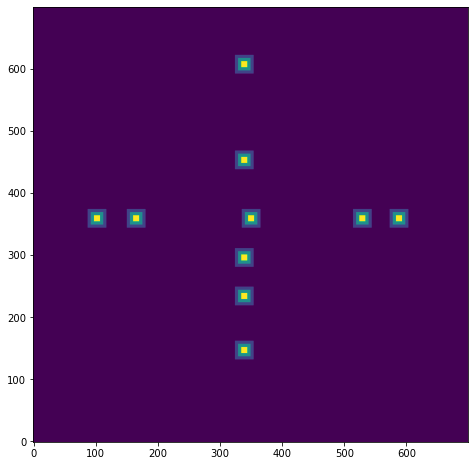

59


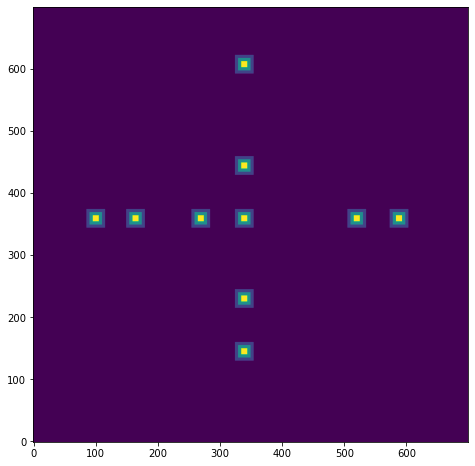

60


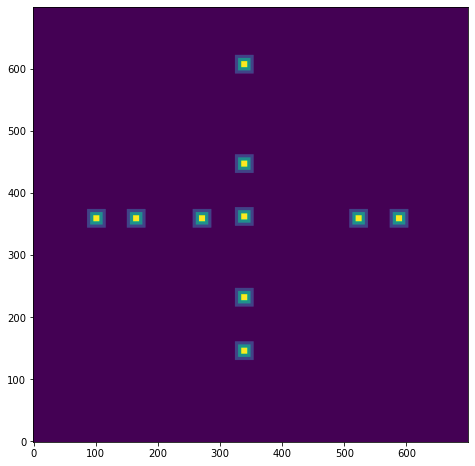

In [65]:
anim = np.copy(grid_anim)
for i in range(grid_anim.shape[0]):
    print(i)
    anim[i] = np.fliplr(grid_anim[i])
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(anim[i], origin='lower', vmax= 100)
    #plt.savefig(r'..\plots\1' + '//' + str(i) + '.png', bbox_inches='tight')
    plt.show()

In [66]:
flux_data = pd.read_csv(r'num_peds.txt', header=None, sep=',' )
flux_data.columns = ['Time', 'Num_peds']
flux_data

,Time,Num_peds
0,0.516667,1
1,1.016667,2
2,1.533333,3
3,2.050000,4
4,2.566667,5
...,...,...
112,58.100000,113
113,58.616667,114
114,59.133333,115
115,59.650000,116


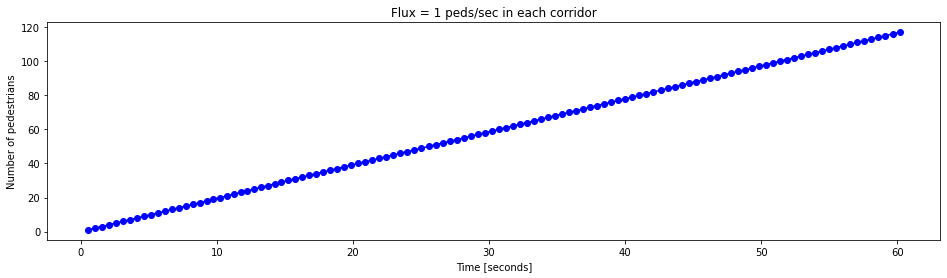

In [73]:
plt.figure(figsize=(16,4))
plt.plot(flux_data['Time'], flux_data['Num_peds'], 'bo-')
plt.xlabel('Time [seconds]')
plt.ylabel('Number of pedestrians')
plt.title('Flux = 1 peds/sec in each corridor')
#plt.savefig(r'..\plots\1peds_sec.png', bbox_inches='tight')